In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [ ]:
c = 1 
h = 0

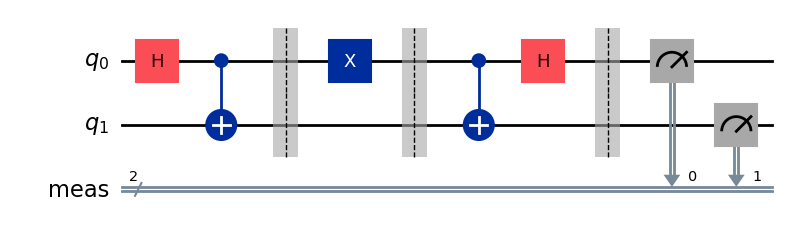

In [3]:
protocol = QuantumCircuit(2)

protocol.h(0)
protocol.cx(0,1)
protocol.barrier()

if h == 1:
    protocol.z(0)
if c ==1 :
    protocol.x(0)

protocol.barrier()

protocol.cx(0,1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw(output='mpl'))

Outcome: 10, Frequency: 1.0


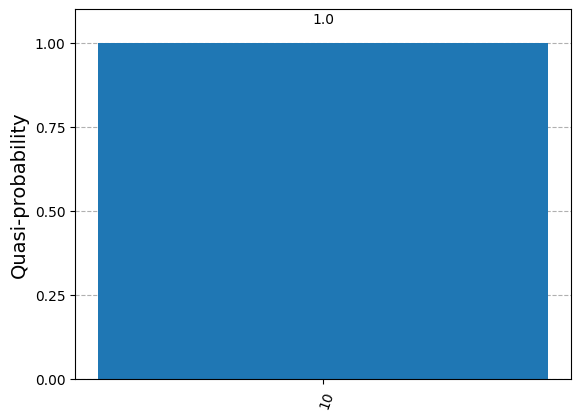

In [14]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Outcome: {outcome}, Frequency: {frequency}")

display(plot_histogram(statistics))

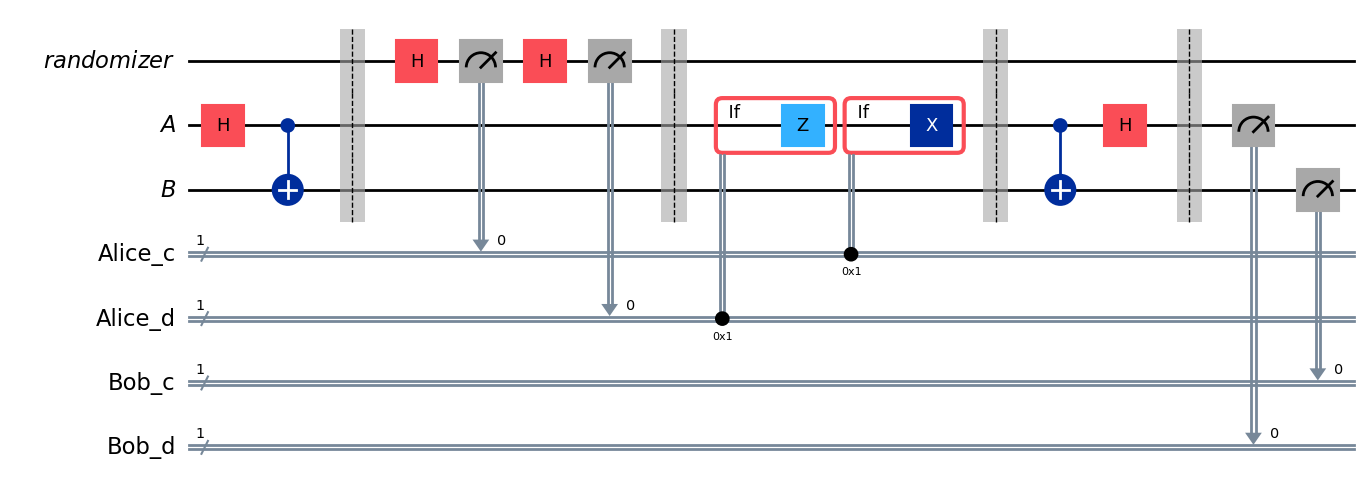

In [15]:

# Step 1: Define Quantum and Classical Registers
randomizer = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")  # Alice's qubit
ebit1 = QuantumRegister(1, "B")  # Bob's qubit
alice_c = ClassicalRegister(1, "Alice_c")
alice_d = ClassicalRegister(1, "Alice_d")
bob_c = ClassicalRegister(1, "Bob_c")
bob_d = ClassicalRegister(1, "Bob_d")

# Step 2: Create the Quantum Circuit
test = QuantumCircuit(randomizer, ebit0, ebit1, alice_c, alice_d, bob_c, bob_d)

# Step 3: Initialize the Entangled Pair (ebit0 and ebit1)
test.h(ebit0)  # Hadamard on ebit0
test.cx(ebit0, ebit1)  # CNOT (control=ebit0, target=ebit1)
test.barrier()

# Step 4: Use the Randomizer to Generate Alice's Bits (c and d)
test.h(randomizer)  # Randomize for c
test.measure(randomizer, alice_c)
test.h(randomizer)  # Randomize for d
test.measure(randomizer, alice_d)
test.barrier()

# Step 5: Alice Encodes Her Message
with test.if_test((alice_d, 1)):
    test.z(ebit0)  # Apply Z gate if Alice's d=1
with test.if_test((alice_c, 1)):
    test.x(ebit0)  # Apply X gate if Alice's c=1
test.barrier()

# Step 6: Bob's Decoding Process
test.cx(ebit0, ebit1)  # Decode using CNOT
test.h(ebit0)  # Decode using Hadamard
test.barrier()

# Step 7: Measurement at Bob's End
test.measure(ebit0, bob_d)
test.measure(ebit1, bob_c)

# Display the Circuit
display(test.draw(output="mpl"))


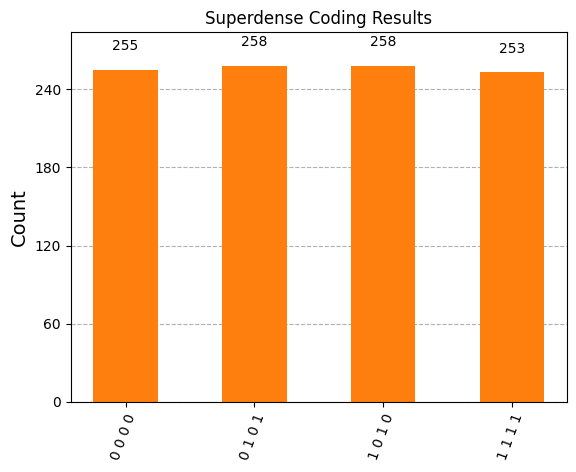

In [21]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()

custom_colors = ['#ff7f0e']  # Example: Blue, Orange, Green, Red
display(plot_histogram(statistics, color=custom_colors, title="Superdense Coding Results"))